### Predicting Medical Expenses Using Linear Regression


In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve


In [5]:
# Getting Data
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url,'medical.csv')



('medical.csv', <http.client.HTTPMessage at 0x120ace490>)

In [6]:
medical_df =  pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Visualization
import plotly.express as px
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
fig = px.histogram(medical_df,x='age',marginal='box'
                   ,nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig  =  px.histogram(medical_df,x='bmi',marginal='box'
                     ,color_discrete_sequence=['red'],
                     title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,x='charges',marginal='box',
                   color='smoker', color_discrete_sequence=['green','blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.2)
fig.show()

In [17]:
medical_df.smoker.value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')


In [19]:
px.histogram(medical_df,x='smoker',color='region',title='Smoker')


In [20]:
px.histogram(medical_df,x='smoker',color='children',title='Smoker')


In [22]:
fig =  px.histogram(medical_df,x='age',y='charges', color='smoker'
                    ,opacity=0.8, hover_data=['sex'],title='Age vs Charges')


fig.show()

In [23]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.show()

In [24]:
fig = px.scatter(medical_df, 
                 x='charges', 
                 y='children', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Charges vs. Children')
                 
fig.show()

<Axes: xlabel='charges', ylabel='children'>

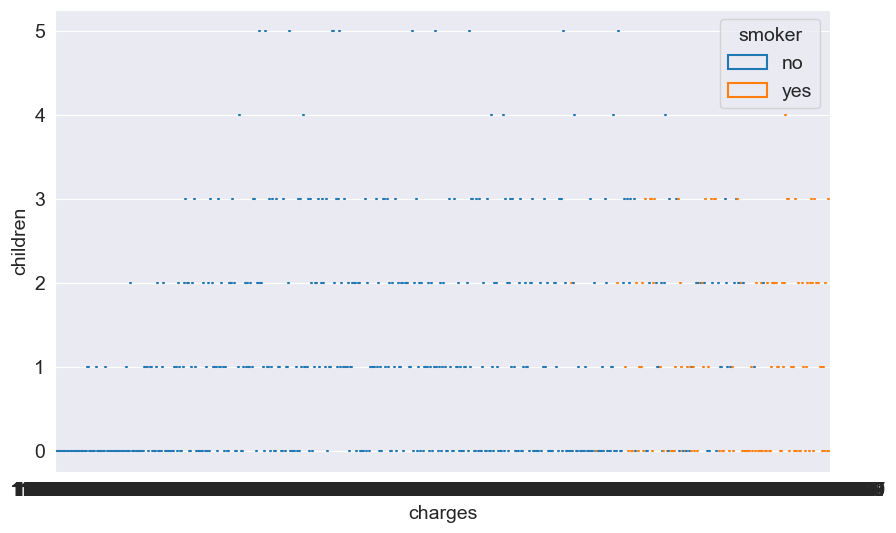

In [26]:

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=medical_df, x="charges", y="children", hue="smoker",
               split=True, inner="quart", fill=False,)
               

In [27]:
fig = px.scatter(medical_df, 
                 x='charges', 
                 y='sex', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Charges vs. Children')
                 
fig.show()

In [28]:
fig = px.scatter(medical_df, 
                 x='charges', 
                 y='region', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Charges vs. Children')
                 
fig.show()

In [29]:
fig = px.scatter(medical_df, 
                 x='charges', 
                 y='smoker', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Charges vs. Children')
                 
fig.show()